# Experimentos

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import trange

from constantes import ESTAMPAS_POR_CAJA, ESTAMPAS_POR_SOBRE
from generacion_estampas import obtener_estampas
from validacion_escenarios import esta_album_completo, numero_secciones_completas, numero_estampas_faltantes

sns.set_style("darkgrid")
sns.set_context("paper")

# Probabilidad de llenar el álbum comprando exactamente 670 estampas

In [2]:
# número de experimentos
n_experimentos = 100_000
n_experimentos_exitosos = 0
estampas_faltantes = []
secciones_completas = []

# parámetros del experimento
n_sobres = 134
n_estampas = n_sobres * ESTAMPAS_POR_SOBRE


for _ in trange(n_experimentos):
    # comprar estampas
    estampas_compradas = obtener_estampas(n_estampas)

    # obteniendo métricas del experimento para estampas faltantes
    estampas_faltantes_experimento = numero_estampas_faltantes(estampas_compradas)
    estampas_faltantes.append(estampas_faltantes_experimento)

    # obteniendo métricas de secciones completas
    secciones_completas_experimento = numero_secciones_completas(estampas_compradas)
    secciones_completas.append(secciones_completas_experimento)

    # determinar si el álbum está completo
    if esta_album_completo(estampas_compradas):
        n_experimentos_exitosos += 1

# calculando los totales
probabilidad_de_llenado = n_experimentos_exitosos / n_experimentos
faltantes_promedio = sum(estampas_faltantes) / n_experimentos
secciones_promedio = sum(secciones_completas) / n_experimentos

# imprimiendo los resultados
print(f"De {n_experimentos:,} se tuvieron {n_experimentos_exitosos:,} experimentos exitosos. Por lo que la probabilidad de llenar el álbum con {n_sobres} sobres es: {probabilidad_de_llenado:%}")
print(f"En promedio te faltarán {faltantes_promedio:.0f} estampas.")
print(f"En promedio llenarás {secciones_promedio:.0f} secciones.")


100%|██████████| 100000/100000 [00:57<00:00, 1735.68it/s]

De 100,000 se tuvieron 0 experimentos exitosos. Por lo que la probabilidad de llenar el álbum con 134 sobres es: 0.000000%
En promedio te faltarán 246 estampas.
En promedio llenarás 0 secciones.


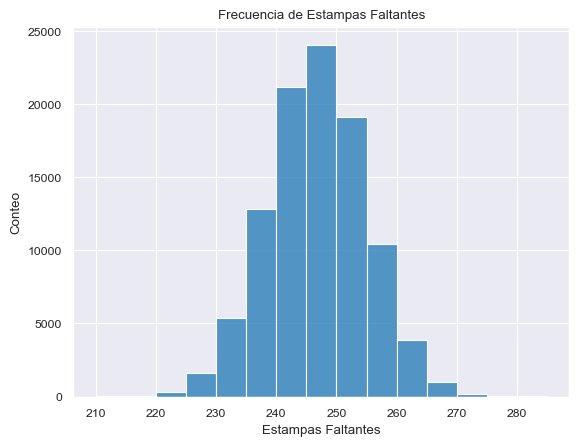

In [3]:
g = sns.histplot(data=estampas_faltantes, binwidth=5)
g.set(xlabel="Estampas Faltantes", ylabel="Conteo", title="Frecuencia de Estampas Faltantes")
plt.savefig('imagenes/estampas_minimas/faltantes_histograma.png', dpi=300, transparent=False);

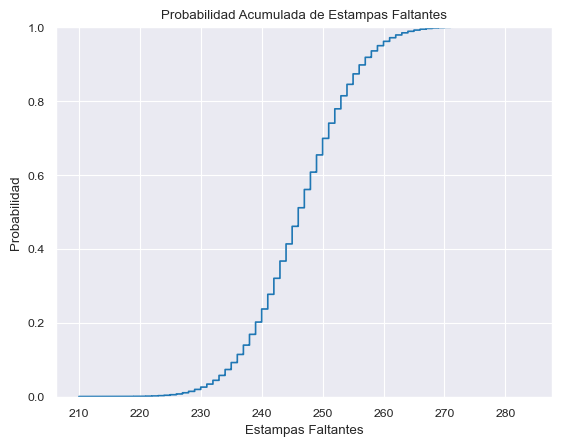

In [4]:
g = sns.ecdfplot(data=estampas_faltantes)
g.set(xlabel="Estampas Faltantes", ylabel="Probabilidad", title="Probabilidad Acumulada de Estampas Faltantes")
plt.savefig('imagenes/estampas_minimas/faltantes_ecdf.png', dpi=300, transparent=False);

# Probabilidad de llenar el álbum con n cajas

In [5]:
cajas_experimentos = [i for i in range(1, 21)]
n_experimentos = 10_000
probabilidades_llenado = []
df_resultados = pd.DataFrame(data=list(zip([], [],  [])), columns=['no_cajas', 'estampas_faltantes', 'secciones_completas'])

for n_cajas in cajas_experimentos:
    # parámetros del experimento
    n_estampas = n_cajas * ESTAMPAS_POR_CAJA

    # métricas del experimento
    n_experimentos_exitosos = 0
    estampas_faltantes = []
    secciones_completas = []

    for _ in trange(n_experimentos, desc=f"Procesando {n_cajas} cajas"):

        # comprando estampas (aleatoriamente)
        estampas_compradas = obtener_estampas(n_estampas=n_estampas)

        # obteniendo métricas de estampas faltantes
        estampas_faltantes_experimento = numero_estampas_faltantes(estampas_compradas)
        estampas_faltantes.append(estampas_faltantes_experimento)

        # obteniendo métricas de secciones completas
        secciones_completas_experimento = numero_secciones_completas(estampas_compradas)
        secciones_completas.append(secciones_completas_experimento)

        if esta_album_completo(estampas_compradas):
            n_experimentos_exitosos += 1
    

    # calculando probabilidad de llenado
    probabilidad_llenado_experimento = n_experimentos_exitosos / n_experimentos
    probabilidades_llenado.append((n_cajas, probabilidad_llenado_experimento))

    # poblando tabla de métricas
    df_resultados_experimento = pd.DataFrame(
        data=list(zip([n_cajas for _ in range(n_experimentos)], estampas_faltantes, secciones_completas)), 
        columns=['no_cajas', 'estampas_faltantes', 'secciones_completas']
    )

    df_resultados = pd.concat([df_resultados, df_resultados_experimento])

Procesando 20 cajas: 100%|██████████| 10000/10000 [00:50<00:00, 199.80it/s]


# Graficando los resultados

In [7]:
# obteniendo consolidado de probabilidades de llenado
df_probabilidades_llenado = pd.DataFrame(probabilidades_llenado, columns=['no_cajas', 'probabilidad_llenado'])

# escribiendo resultados
df_resultados.to_csv('./datos/resultados_n_cajas.csv')
df_probabilidades_llenado.to_csv('./datos/probabilidades_llenado.csv')

In [8]:
df_probabilidades_llenado = pd.read_csv('./datos/probabilidades_llenado.csv', index_col=0)
df_resultados = pd.read_csv('./datos/resultados_n_cajas.csv', index_col=0)

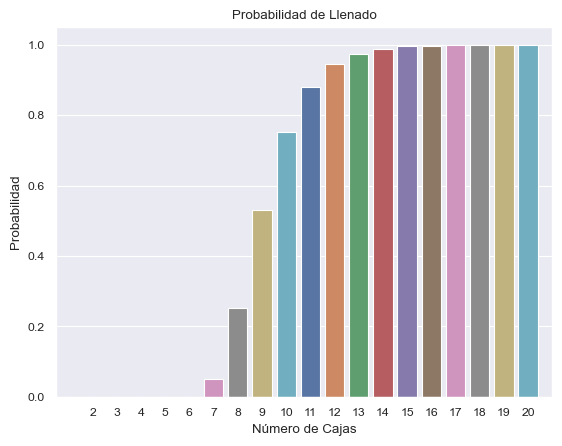

In [9]:
g = sns.barplot(data=df_probabilidades_llenado, x='no_cajas', y='probabilidad_llenado', palette='deep')
g.set(xlabel="Número de Cajas", ylabel="Probabilidad", title="Probabilidad de Llenado")
g.set_xticks(range(1, 21))
plt.savefig('imagenes/n_cajas/probabilidad_llenado.png', dpi=300, transparent=False);

In [10]:
df_agrupado_cajas = df_resultados.groupby(['no_cajas']).mean().reset_index()
df_agrupado_cajas.head()

,no_cajas,estampas_faltantes,secciones_completas
0,1,308.0425,0.0002
1,2,141.5741,0.2757
2,3,65.1495,4.1597
3,4,29.8988,13.0553
4,5,13.7698,21.6382


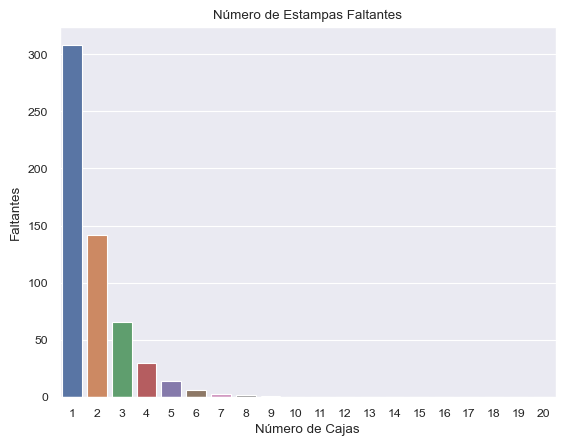

In [11]:
g = sns.barplot(data=df_agrupado_cajas, x="no_cajas", y="estampas_faltantes", palette='deep')
g.set(xlabel="Número de Cajas", ylabel="Faltantes", title="Número de Estampas Faltantes")
plt.savefig('imagenes/n_cajas/estampas_faltantes.png', dpi=300, transparent=False);

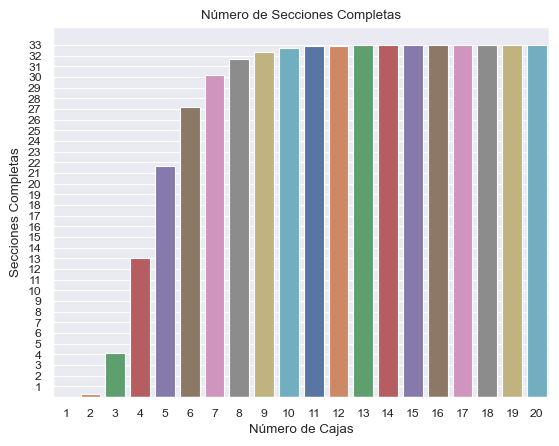

In [12]:
g = sns.barplot(data=df_agrupado_cajas, x="no_cajas", y="secciones_completas", palette='deep')
g.set(xlabel="Número de Cajas", ylabel="Secciones Completas", title="Número de Secciones Completas")
g.set_yticks(range(1, 34))
plt.savefig('imagenes/n_cajas/secciones_completas.png', dpi=300, transparent=False);

## Histogramas para 1 y 2 cajas de sobres

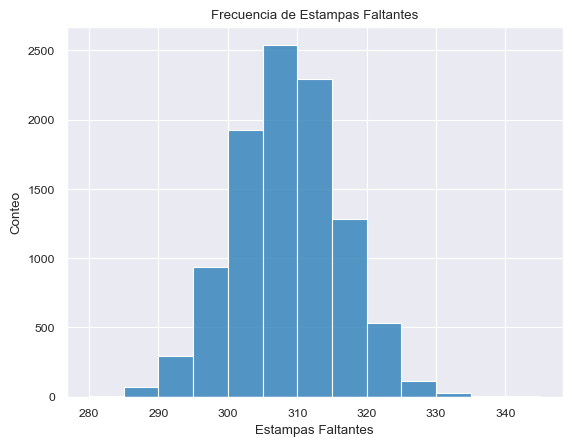

In [13]:
g = sns.histplot(data=df_resultados[df_resultados.no_cajas == 1],binwidth=5, x="estampas_faltantes")
g.set(xlabel="Estampas Faltantes", ylabel="Conteo", title="Frecuencia de Estampas Faltantes")
plt.savefig('imagenes/estampas_minimas/faltantes_histograma_caja_1.png', dpi=300, transparent=False);

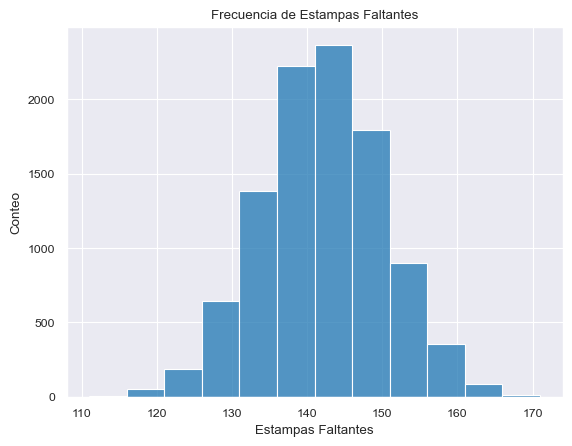

In [14]:
g = sns.histplot(data=df_resultados[df_resultados.no_cajas == 2],binwidth=5, x="estampas_faltantes")
g.set(xlabel="Estampas Faltantes", ylabel="Conteo", title="Frecuencia de Estampas Faltantes")
plt.savefig('imagenes/estampas_minimas/faltantes_histograma_caja_2.png', dpi=300, transparent=False);